In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
housing = pd.read_csv(r'data/housing.csv')

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
housing = housing.drop(['ocean_proximity'], axis=1)

In [34]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [35]:
bedrooms_mean = SimpleImputer(strategy='mean')

In [36]:
housing[['total_bedrooms']] = bedrooms_mean.fit_transform(housing[['total_bedrooms']])

In [37]:
housing[['total_bedrooms']].describe()

,total_bedrooms
count,20640.000000
mean,537.870553
std,419.266592
min,1.000000
25%,297.000000
50%,438.000000
75%,643.250000
max,6445.000000


## Förbereda datan

In [38]:
#Standardiserar värden
scaleStandard = StandardScaler()
housing_scaled = scaleStandard.fit_transform(housing)
housing_scaled = pd.DataFrame(housing_scaled, columns= ['longitude', 'latitude', 'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households', 'median_income', 'median_house_value'])
housing_scaled.describe().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.386,-1.448,-2.196,-1.207,-1.281,-1.256,-1.304,-1.774,-1.663
25%,-1.113,-0.797,-0.845,-0.545,-0.575,-0.564,-0.574,-0.688,-0.756
50%,0.539,-0.642,0.029,-0.233,-0.238,-0.229,-0.237,-0.177,-0.235
75%,0.778,0.973,0.664,0.235,0.251,0.264,0.276,0.459,0.501
max,2.625,2.958,1.856,16.816,14.090,30.250,14.602,5.858,2.540


In [39]:
#Sparar median_house_value som y, och gör den till en series
y = housing[['median_house_value']]
y = y.squeeze()


#Sparar resten av housing som X. 
X = housing_scaled.drop(housing_scaled[['median_house_value']], axis = 1)

In [40]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.3, random_state = 13)

In [41]:
X_train_full_copy = X_train_full.copy()
X_train_full_copy['target'] = y_train_full
X_train_full_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
20025,0.259400,0.205131,-0.607019,-0.075067,-0.035469,-0.165552,0.011666,-1.102799,62900.0
10772,0.838392,-0.923199,0.267020,0.045947,0.028931,-0.129347,0.090135,0.879856,253100.0
16691,-0.519243,-0.234965,-1.004309,0.364526,0.436796,0.310414,0.526941,-0.600371,190400.0
11946,1.067992,-0.796789,0.187562,-0.624673,-0.658000,-0.652997,-0.642235,-0.725597,109400.0
6532,0.743557,-0.731243,0.267020,0.666145,1.042630,2.074754,1.191305,-0.305652,205500.0
...,...,...,...,...,...,...,...,...,...
17677,-1.138166,0.795046,-1.004309,0.161002,0.801728,2.486257,0.893126,-0.562314,127900.0
4023,0.523940,-0.679742,1.379433,-0.253838,-0.238209,-0.334215,-0.278666,-0.114367,216000.0
7259,0.698635,-0.759334,0.584852,-0.448652,-0.269216,0.232705,-0.213276,-0.574158,149300.0
3775,0.578844,-0.689106,-1.163225,-0.943710,-0.925139,-0.930276,-0.966570,0.166772,275000.0


<Axes: >

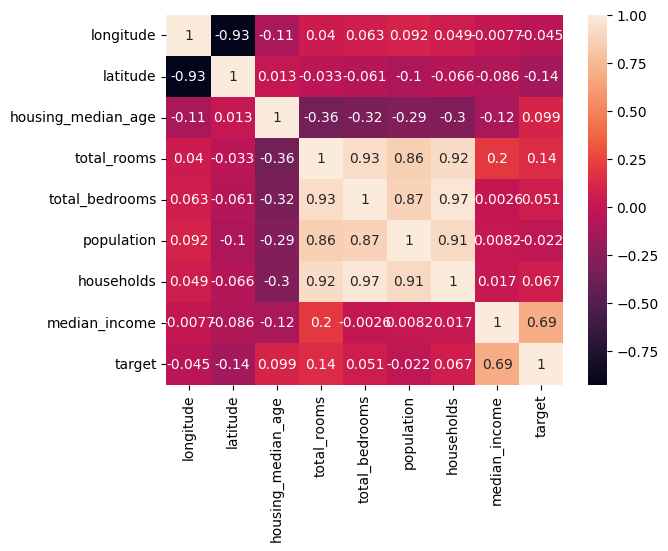

In [42]:
correlation_matrix = X_train_full_copy.corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='median_income', ylabel='target'>

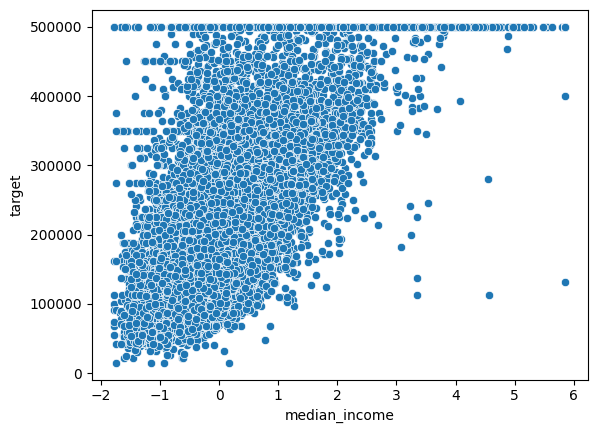

In [43]:
sns.scatterplot(data=X_train_full_copy, x=X_train_full_copy['median_income'], y=X_train_full_copy['target'])

## Models

In [44]:
lin_reg = LinearRegression()
scores_lr = cross_validate(lin_reg, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
scores_lr
print('RMSE för varje iteration', np.sqrt(-scores_lr['test_score']))
print('RMSE', np.sqrt(np.mean(-scores_lr['test_score'])))


RMSE för varje iteration [71334.55167211 73914.3265784  69103.33089086 65188.64380031
 69838.29437087]
RMSE 69934.4877970348


In [45]:
lasso = Lasso()
hyper_param_lasso = {'alpha': (1, 10, 25, 50, 75, 85, 90, 95, 100)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)

scores_lasso = cross_validate(lasso_reg, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print('RMSE för varje iteration', np.sqrt(-scores_lasso['test_score']))
print('RMSE', np.sqrt(np.mean(-scores_lasso['test_score'])))

{'alpha': 85}
RMSE för varje iteration [71361.49683815 73903.25629837 69111.86694598 65176.20645953
 69836.44276725]
RMSE 69936.64461793909


In [56]:

forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [1, 10, 30],
    'max_depth': [None, 3],
}

forest_reg = GridSearchCV(forest, param_grid=param_grid, cv = 5, n_jobs=-1)
forest_reg.fit(X_train, y_train)

print(forest_reg.best_params_)


{'max_depth': None, 'n_estimators': 30}


In [ ]:
forest.fit(X_train, y_train)


RandomForestRegressor()

In [53]:
forest.score(X_train, y_train)

0.9731343603499616

In [47]:
lin_reg.fit(X_train_full, y_train_full)

LinearRegression()

## Utvärdering

210385.36724806202


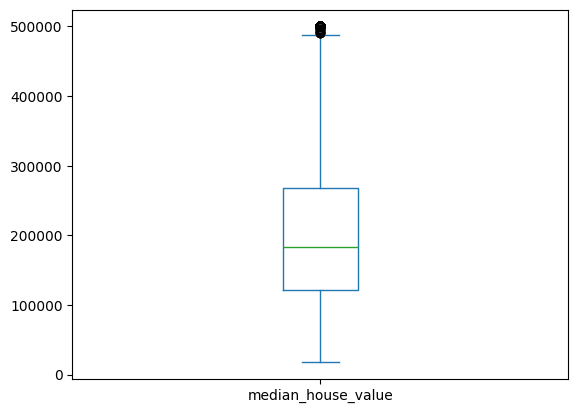

In [48]:
y_test.plot.box()
print(np.mean(y_test))

In [49]:
y_test_pred_lr = lin_reg.predict(X_test)
RMSE_test_data = root_mean_squared_error(y_test, y_test_pred_lr)
print(RMSE_test_data)

69571.46271753468


In [50]:
(RMSE_test_data)/(np.mean(y_test))

np.float64(0.3306858439232805)